# HYPOTHESIS TESTING

In [97]:
import numpy as np
import pandas as pd

from scipy.stats import t
from scipy.stats import norm
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

import seaborn as sns; sns.set()
from matplotlib import pyplot as plt

In [98]:
path_cleaned_data = '../data/train/diamonds_train_ht.csv'

diamonds_df = pd.read_csv(path_cleaned_data)
diamonds_df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [99]:
diamonds_df.head()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,...,clarity_VVS1,clarity_VVS2,price,carat,depth,table,volume,L/W_ratio,V/W_Ratio,T/D_ratio
0,0,0,0,1,0,0,0,0,0,0,...,0,0,4268,1.21,62.4,58.0,314.89,0.6,260.24,0.929487
1,0,0,0,0,1,0,0,0,0,1,...,0,0,505,0.32,63.0,57.0,83.45,0.7,260.78,0.904762
2,1,0,0,0,0,0,0,0,1,0,...,0,0,2686,0.71,65.5,55.0,171.86,1.6,242.06,0.839695
3,0,1,0,0,0,1,0,0,0,0,...,0,0,738,0.41,63.8,56.0,104.26,0.9,254.29,0.877743
4,0,0,1,0,0,0,0,0,1,0,...,0,0,4882,1.02,60.5,59.0,277.59,0.6,272.15,0.975207


In [100]:
diamonds_df.shape

(40378, 28)

## 1. Sample vs Constant

We know from the available literature that diamonds average price rounds about 4000 USD. The aim is to test whether the prices in our sample are significantly different from the literature value. Give some conclusions about the implications of your test results.

By Scipy:

In [101]:
mu = 4000

test_results = ttest_1samp(diamonds_df['price'], 4000)
p_value_good = test_results.pvalue /2

display(p_value_good) # scipy is p_value of both sides

print(f"Null Hypothesis: Price mean is not significantly different than the constant <> Avg price round about 4000")
print(f"Can we reject Null Hypothesis: \t{p_value_good < 0.05}")

6.617783042436085e-05

Null Hypothesis: Price mean is not significantly different than the constant <> Avg price round about 4000
Can we reject Null Hypothesis: 	True


By Hand:

In [102]:
mu_hat = diamonds_df['price'].mean()
n = diamonds_df.shape[0]
std_hat = diamonds_df['price'].std()

In [103]:
t_test = (mu_hat - mu) / (std_hat / np.sqrt(n))
t_test # t_test is the same as scipy
rv = t(df=n-1)
p_value = rv.cdf(t_test)

print(p_value)
display(p_value == p_value_good)

6.617783042436085e-05


True

## 2 Two independent samples. 

The sample includes diamonds with different features (carat, cut, color clarity, ..). It seems clear that the carat plays an important role in price. However, it's not that clear whether the prices of some "sub-groups" are significantly different from each other. These are the "sub-groups" that we might feel suspicious about:

>- Sub-Test 1: Fair cut + color G vs. Fair cut + color I
>- Sub-Test 2: Good cut + color E vs. Good cut + color F
>- Sub-Test 3: Ideal cut + color D vs. Ideal cut + color E
>- Sub-Test 4: Premium cut + color D vs. Premium cut + color E
>- Sub-Test 5: Very Good cut + color I vs. Very Good cut + color J
>- Sub-Test 6: All cuts + color D vs. All cuts + color E

H0 := mu_one == mu_one -> means from different samples do not have a significant variance

### Sub Test 1

In [20]:
sub_test_11 = diamonds_df[(diamonds_df['cut_Fair'] == 1) & (diamonds_df['color_G'] == 1)]
sub_test_12 = diamonds_df[(diamonds_df['cut_Fair'] == 1) & (diamonds_df['color_I'] == 1)]

In [24]:
test_results_11 = ttest_ind(sub_test_11['price'], sub_test_12['price'], equal_var = False, nan_policy = 'omit')
test_results_12 = ttest_ind(sub_test_11['price'], sub_test_12['price'], equal_var = True, nan_policy = 'omit')

display(test_results_11[1])
display(test_results_12[1])

0.8893500463066848

0.8908874002307834

p_11 and p_12 are > 0.05 --> **Null Hypothesis cannot be rejected.** 

There is a 95% chance that test_results_11 and test_results_12 ARE RELATED.

### Sub Test 2

In [25]:
sub_test_21 = diamonds_df[(diamonds_df['cut_Good'] == 1) & (diamonds_df['color_E'] == 1)]
sub_test_22 = diamonds_df[(diamonds_df['cut_Good'] == 1) & (diamonds_df['color_F'] == 1)]

In [26]:
test_results_21 = ttest_ind(sub_test_21['price'], sub_test_22['price'], equal_var = False, nan_policy = 'omit')
test_results_22 = ttest_ind(sub_test_21['price'], sub_test_22['price'], equal_var = True, nan_policy = 'omit')

display(test_results_21[1])
display(test_results_22[1])

0.6433618593904988

0.6436801009386424

p_21 and p_22 are > 0.05 --> **Null Hypothesis cannot be rejected.** 

There is a 95% chance that test_results_21 and test_results_22 ARE RELATED.

In [28]:
diamonds_df.columns

Index(['cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'price',
       'carat', 'depth', 'table', 'volume', 'L/W_ratio', 'V/W_Ratio',
       'T/D_ratio'],
      dtype='object')

## GENERALIZING SUB TEST FOR COLOR

For synthesis purposes, the subtests are made for every category of against every other.

In [76]:
color_cols = [ 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J']
cut_cols = ['cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good']
clarity_cols = ['clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']

In [77]:
test_results = []
for cut_col in cut_cols:
    test_results_by_cut = []
    for color_col_1 in color_cols:
        test_results_by_cut_col = []
        for color_col_2 in color_cols[::-1]:

            sub_test_1 = diamonds_df[(diamonds_df[cut_col] == 1) & (diamonds_df[color_col_1] == 1)]
            sub_test_2 = diamonds_df[(diamonds_df[cut_col] == 1) & (diamonds_df[color_col_2] == 1)]

            test_results_1 = ttest_ind(sub_test_1['price'], sub_test_2['price'], equal_var = False, nan_policy = 'omit')
            test_results_2 = ttest_ind(sub_test_1['price'], sub_test_2['price'], equal_var = True, nan_policy = 'omit')

            result = np.round(max(test_results_1[1], test_results_2[1]), 4)
            res = 0 if result > 0.05 else 1 # With 1 -> Null Hypothesis is rejected
            
            test_results_by_cut_col.append(res)
        test_results_by_cut.append(test_results_by_cut_col)
    test_results.append(test_results_by_cut)

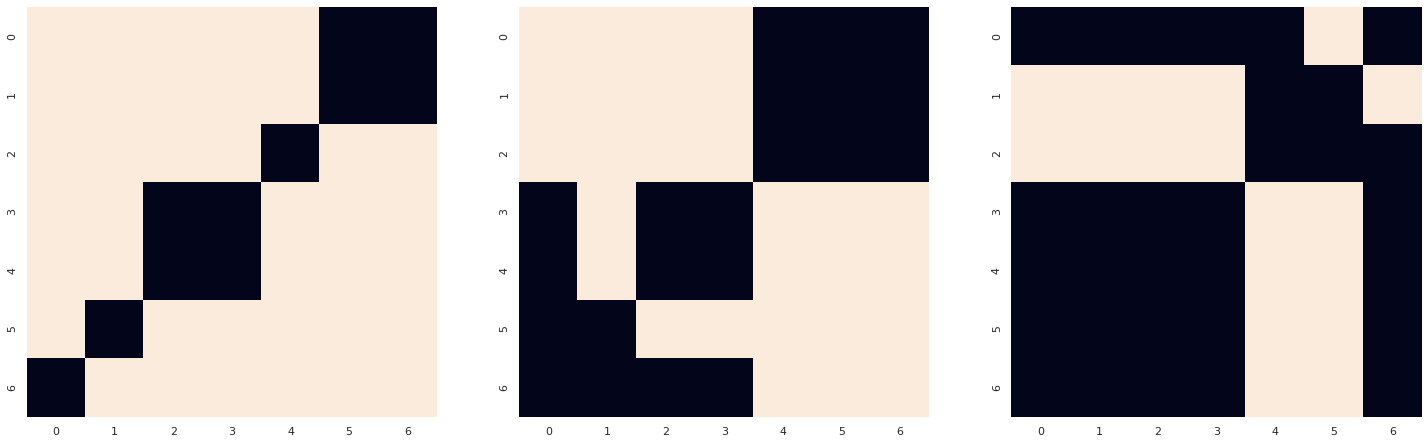

In [75]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3)
fig.set_size_inches(25, 25)
# 0 -> Black. Null hypothesis cannot be rejected -> There is probability of relationship between variables
# 1 -> White. Null Hypothesis rejected -> Probability of independent variables

cut_order = ['cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good']
color_order = ['color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J']

g1 = sns.heatmap(test_results[2], cbar=False, ax=ax1, square = True) # Ideal == Very Good == Premium
g2 = sns.heatmap(test_results[1], cbar=False, ax=ax2, square = True) # Good
g3 = sns.heatmap(test_results[0], cbar=False, ax=ax3, square = True) # Fair

fig.show()

For the best cut categories **[Ideal, Premium and Very Good]**
>- colors F and G are related to eachother
>- colors I and J are related to eachother

For **Good** cut quality:
>- colors D,E,F and G are related to D
>- colors D and e are related to eachother
>- colors F and G are related to eachother
>- colors H, I and J are related to eachother

For **Fair** cut quality:
>- colors D,E,F and G are related to eachother
>- colors H and I are related to eachother
>- color J is related to everyother category except of I

## GENERALIZING SUB TEST FOR CLARITY

For synthesis purposes, the subtests are made for every category of against every other.

In [93]:
test_results = []
for cut_col in cut_cols:
    test_results_by_cut = []
    for color_col_1 in clarity_cols:
        test_results_by_cut_col = []
        for color_col_2 in clarity_cols[::-1]:

            sub_test_1 = diamonds_df[(diamonds_df[cut_col] == 1) & (diamonds_df[color_col_1] == 1)]
            sub_test_2 = diamonds_df[(diamonds_df[cut_col] == 1) & (diamonds_df[color_col_2] == 1)]

            test_results_1 = ttest_ind(sub_test_1['price'], sub_test_2['price'], equal_var = False, nan_policy = 'omit')
            test_results_2 = ttest_ind(sub_test_1['price'], sub_test_2['price'], equal_var = True, nan_policy = 'omit')

            result = np.round(max(test_results_1[1], test_results_2[1]), 4)
            res = 0 if result > 0.05 else 1 # With 1 -> Null Hypothesis is rejected
            
            test_results_by_cut_col.append(res)
        test_results_by_cut.append(test_results_by_cut_col)
    test_results.append(test_results_by_cut)

# clarity_order = ['clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']
order_clarity = [1,4,5,6,7,2,3,0]
test_res = [[[test[i] for i in order_clarity] for test in test_result] for test_result in test_results]

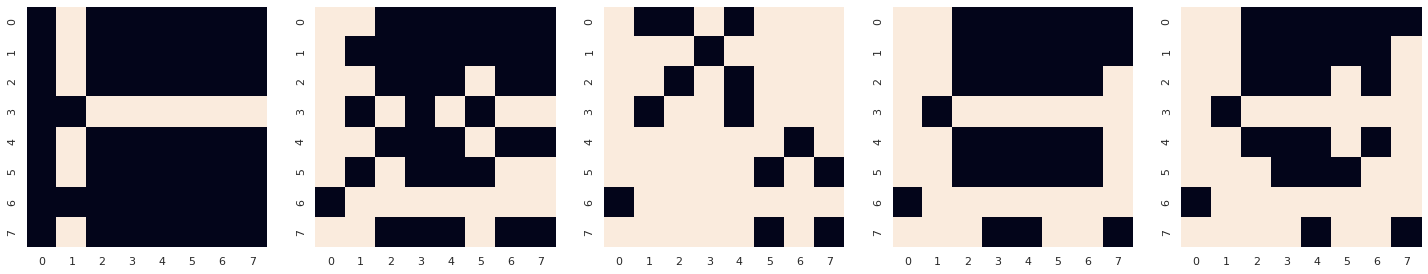

In [96]:
fig,(ax1,ax2,ax3,ax4, ax5) = plt.subplots(1,5)
fig.set_size_inches(25, 25)
# 0 -> Black. Null hypothesis cannot be rejected -> There is probability of relationship between variables
# 1 -> White. Null Hypothesis rejected -> Probability of independent variables

cut_order = ['cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good']
clarity_order = [ 'clarity_IF', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'clarity_SI1', 'clarity_SI2', 'clarity_I1']

g1 = sns.heatmap(test_res[0], cbar=False, ax=ax1, square = True) 
g2 = sns.heatmap(test_res[1], cbar=False, ax=ax2, square = True) 
g3 = sns.heatmap(test_res[2], cbar=False, ax=ax3, square = True)
g4 = sns.heatmap(test_res[3], cbar=False, ax=ax4, square = True)
g5 = sns.heatmap(test_res[4], cbar=False, ax=ax5, square = True)

For **Ideal** cut quality: All clarity categories are dependent expect for clarity VS1

For **Premium** Cut quality: A posible generalization is taht the less clarity, the more related are the variables

For **Very Good** Cut quality: A possible generalization is that most variables are independant of each other

For **Good and Fair** Cut Quality: **TO BE DONE**